# Classification of breast cancer dataset

1. First import required dataset and libraries. <br><br>
Libraries:<br>
Pandas - creation of dataframe <br>
Numpy - computation on dataset numpy array <br>
Matplotlib - visualization of dataset <br>
Seaborn - visualization of dataset <br>
sklearn - obtain dataset <br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# Dataset found at : http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

data = load_breast_cancer()

#to get more information on dataset
#print(data)
#print(data.data) #correspond to feature names
#print(data.target) #benign or malignant
#print(data.target_names)
#print(data.feature_names)

2. Creating the dataframe for dataset and creating tabulation of data and features.

In [2]:
data_f = pd.DataFrame(np.c_[data['data'], data['target']], columns = np.append(data['feature_names'], ['target(benign/malignant)']))
#print("data shape", data_f.shape)
#print(type(data_f))
print(data_f['target(benign/malignant)'].value_counts())
data_f

1.0    357
0.0    212
Name: target(benign/malignant), dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target(benign/malignant)
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


3. Plot and tabulate the dataset

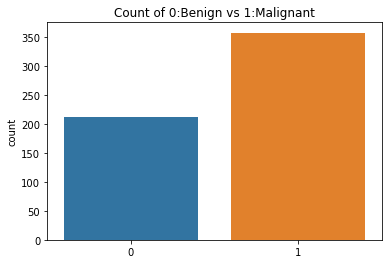

In [3]:
#converting dataframe to numpy
data_np = data_f.to_numpy()
#print(type(data_np))
#print(data_np)

#using matplotlib to plot one feature
#li = list(range(0,data_np.shape[0]))
#mean_rads = data_np[:,0]
#plt.scatter(li, mean_rads)
#plt.ylabel('mean radius')
#plt.xlabel('datapoint')
#plt.title('Mean radius vs datapoints')

ax = sns.countplot(data['target'],label = "count").set_title("Count of 0:Benign vs 1:Malignant")

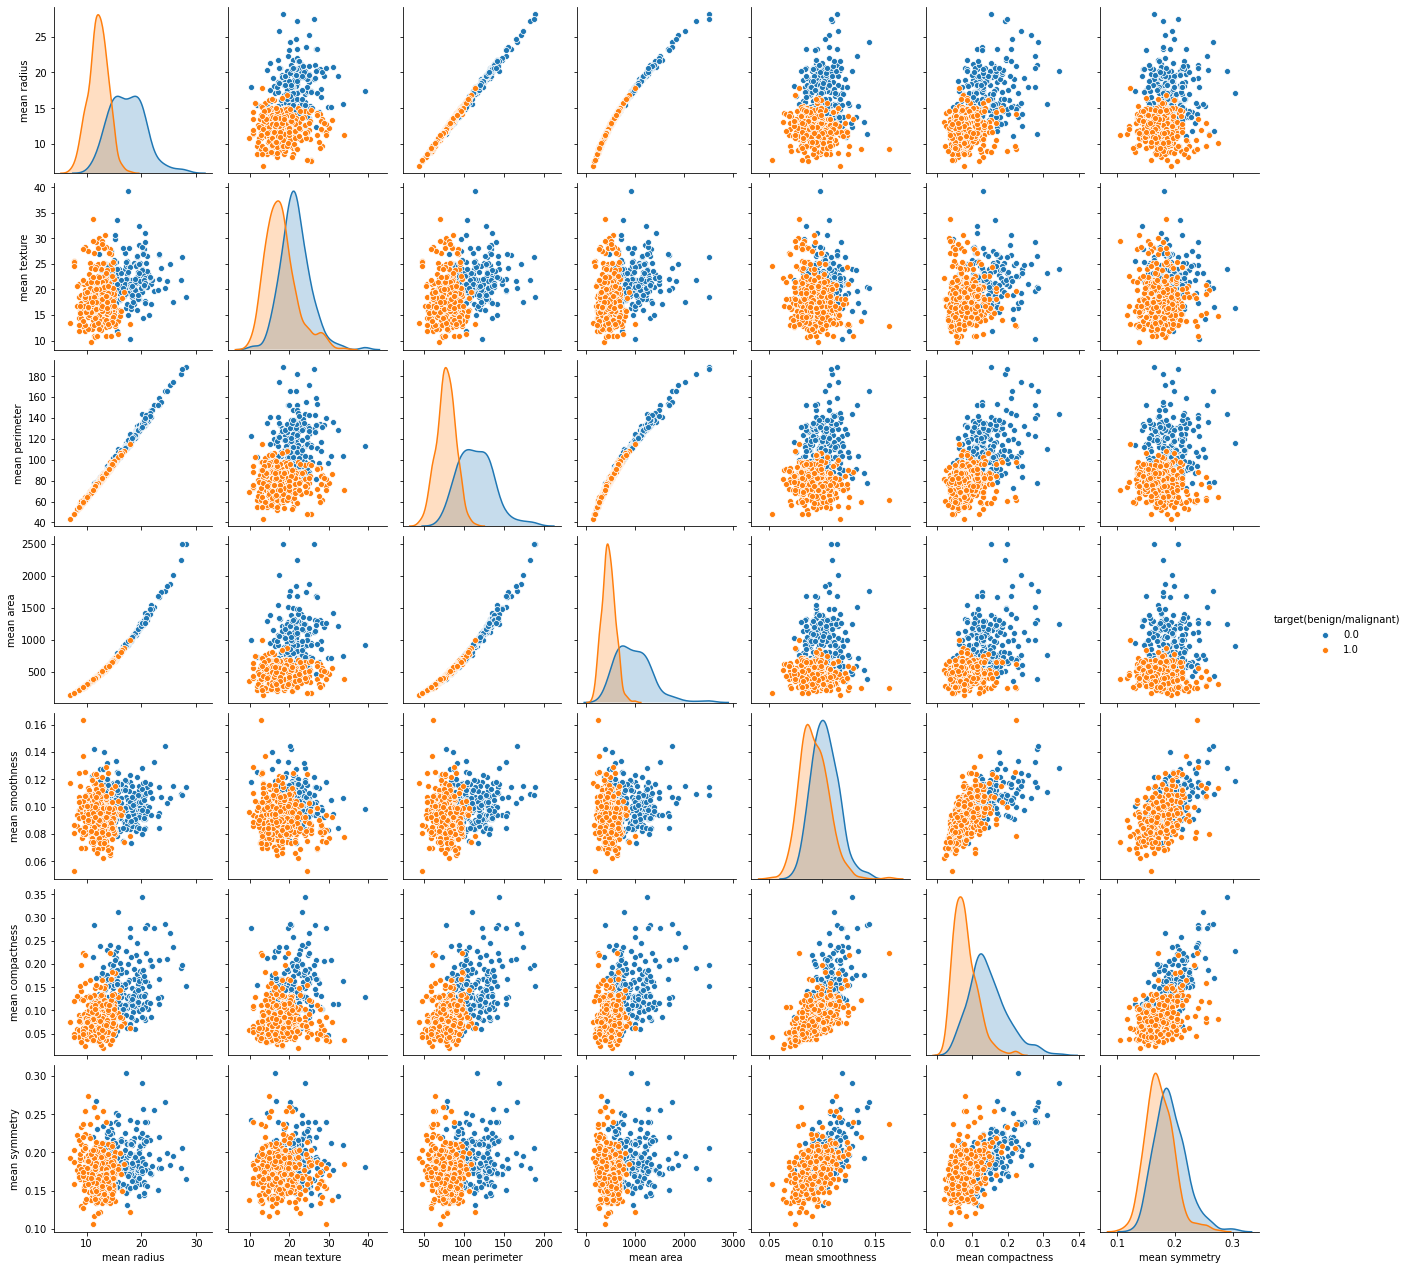

In [4]:
#plotting features in relation to other features
sns.pairplot(data_f, hue = 'target(benign/malignant)',vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness','mean compactness', 'mean symmetry'] )
#sns.pairplot(data_f, hue = 'target(benign/malignant)',vars = ['mean radius', 'mean texture', 'mean perimeter'] )

4. Creating training and testing data

In [5]:
#remove the label from the dataframe
tdata = data_f.drop(['target(benign/malignant)'],axis = 1)
tlabel = data_f['target(benign/malignant)']
#print(tdata.head())
#print(tlabel.head())
test_percent = 0.10
train_data, test_data, train_label, test_label = train_test_split(tdata, tlabel, test_size = test_percent, random_state = 20)

print(train_data.shape)   #(398x30)
print(train_label.shape)  #(398x1)
print(test_data.shape)    #(171,30)
print(test_label.shape)   #(171,1)

train_data


(512, 30)
(512,)
(57, 30)
(57,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.038210,0.1925,0.06373,...,14.970,24.64,96.05,677.9,0.1426,0.23780,0.2671,0.10150,0.3014,0.08750
447,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.022600,0.1893,0.05886,...,16.430,22.74,105.90,829.5,0.1226,0.18810,0.2060,0.08308,0.3600,0.07285
80,11.450,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.022330,0.1842,0.07005,...,13.110,32.16,84.53,525.1,0.1557,0.16760,0.1755,0.06127,0.2762,0.08851
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.1297,0.13570,0.0688,0.02564,0.3105,0.07409
165,14.970,19.76,95.50,690.2,0.08421,0.05352,0.01947,0.019390,0.1515,0.05266,...,15.980,25.82,102.30,782.1,0.1045,0.09995,0.0775,0.05754,0.2646,0.06085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,19.800,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.086910,0.2094,0.05581,...,25.730,28.64,170.30,2009.0,0.1353,0.32350,0.3617,0.18200,0.3070,0.08255
223,15.750,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.064620,0.1935,0.06303,...,19.560,30.29,125.90,1088.0,0.1552,0.44800,0.3976,0.14790,0.3993,0.10640
271,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.027550,0.1769,0.06270,...,12.320,16.18,78.27,457.5,0.1358,0.15070,0.1275,0.08750,0.2733,0.08022
474,10.880,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.015710,0.1861,0.06837,...,11.940,19.35,80.78,433.1,0.1332,0.38980,0.3365,0.07966,0.2581,0.10800


In [6]:
#appying SVM
svc_model = SVC()
svc_model=svc_model.fit(train_data, train_label)
result=svc_model.predict(test_data)

cm = np.array(confusion_matrix(test_label, result, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print("CONFUSION MATRIX \n")
print(confusion)
print("\n CLASSIFICATION REPORT \n")
print(classification_report(test_label, result))

CONFUSION MATRIX 

            predicted_cancer  predicted_healthy
is_cancer                 32                  0
is_healthy                 4                 21

 CLASSIFICATION REPORT 

              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91        25
         1.0       0.89      1.00      0.94        32

    accuracy                           0.93        57
   macro avg       0.94      0.92      0.93        57
weighted avg       0.94      0.93      0.93        57



In [7]:
#IMPROVING MODEL WITH PCA: applying PCA with SVM
from sklearn.preprocessing import StandardScaler
#standard_train_data = StandardScaler().fit_transform(train_data)
from sklearn.decomposition import PCA
#determine dimension
pca = PCA(n_components=10)
#apply PCA on test and train data
principalComponents = pca.fit_transform(train_data)
principalComponentstest = pca.fit_transform(test_data)

#create svm model with pca
pca_svc_model = SVC()
#training with pca train data 
pca_svc_model.fit(principalComponents, train_label)

#testing with pca test data
pca_result = pca_svc_model.predict(principalComponentstest)

#create confusion matrix
#pca_cm = confusion_matrix(test_label, pca_result)
pca_cm = np.array(confusion_matrix(test_label, pca_result, labels=[1,0]))
pca_confusion = pd.DataFrame(pca_cm, index=['is_cancer', 'is_healthy'],
                    columns=['predicted_cancer','predicted_healthy'])
print("CONFUSION MATRIX \n")
print(pca_confusion)
print("\n CLASSIFICATION REPORT \n")
print(classification_report(test_label, pca_result))

CONFUSION MATRIX 

            predicted_cancer  predicted_healthy
is_cancer                 32                  0
is_healthy                 3                 22

 CLASSIFICATION REPORT 

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94        25
         1.0       0.91      1.00      0.96        32

    accuracy                           0.95        57
   macro avg       0.96      0.94      0.95        57
weighted avg       0.95      0.95      0.95        57



In [8]:
#IMPROVING MODEL: normalizing data

#normalize training data
min_train_data = train_data.min()
max_train_data = train_data.max()
range_train_data = (max_train_data-min_train_data)
norm_train_data = (train_data-min_train_data)/range_train_data

#normalize testing data
min_test_data = test_data.min()
#max_test_data = test_data.max()
range_test_data =(test_data-min_test_data).max()
norm_test_data = (test_data-min_test_data)/range_train_data

#print(norm_test_data.shape)
#print(test_label.shape)
print(norm_train_data)
#print(train_label.shape)
norm_svc_model = SVC()
norm_svc_model.fit(norm_train_data, train_label)
norm_result = svc_model.predict(norm_test_data)

norm_cm = np.array(confusion_matrix(test_label, norm_result, labels=[1,0]))
norm_confusion = pd.DataFrame(norm_cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

print("CONFUSION MATRIX \n")
print(norm_confusion)
print("\n CLASSIFICATION REPORT \n")
print(classification_report(test_label, norm_result))

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
204     0.259785      0.284429        0.257757   0.143542         0.424483   
447     0.370060      0.251903        0.359961   0.225366         0.353525   
80      0.211510      0.366436        0.207449   0.109438         0.519726   
46      0.057504      0.223529        0.054730   0.024772         0.301255   
165     0.378106      0.324567        0.357335   0.231898         0.285095   
..           ...           ...             ...        ...              ...   
218     0.606702      0.386851        0.593670   0.460870         0.371942   
223     0.415022      0.341522        0.406399   0.262057         0.450212   
271     0.203938      0.092042        0.196531   0.103712         0.412657   
474     0.184533      0.181315        0.183954   0.091368         0.433962   
355     0.264045      0.300692        0.263493   0.145196         0.315699   

     mean compactness  mean concavity  mean concave points  mea

C:\Users\Evon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
